1
(a) As shown below, layer name: conv1_conv; Filter size F = 7;  Zero padding P = 3; Stride S = 2; # of channels in the filter = 3; Total number of filters = 64

In [1]:
# visualize feature maps output from each block in the vgg model
# https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims


# load the model
model = ResNet50()
# summarize the model
model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [2]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    if 'pad' in layer.name:
        continue
    if 'bn' in layer.name:
        continue
    if 'relu' in layer.name:
        continue
    if 'add' in layer.name:
        continue
    if 'out' in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

2 conv1_conv (None, 112, 112, 64)
7 conv2_block1_1_conv (None, 56, 56, 64)
10 conv2_block1_2_conv (None, 56, 56, 64)
13 conv2_block1_0_conv (None, 56, 56, 256)
14 conv2_block1_3_conv (None, 56, 56, 256)
19 conv2_block2_1_conv (None, 56, 56, 64)
22 conv2_block2_2_conv (None, 56, 56, 64)
25 conv2_block2_3_conv (None, 56, 56, 256)
29 conv2_block3_1_conv (None, 56, 56, 64)
32 conv2_block3_2_conv (None, 56, 56, 64)
35 conv2_block3_3_conv (None, 56, 56, 256)
39 conv3_block1_1_conv (None, 28, 28, 128)
42 conv3_block1_2_conv (None, 28, 28, 128)
45 conv3_block1_0_conv (None, 28, 28, 512)
46 conv3_block1_3_conv (None, 28, 28, 512)
51 conv3_block2_1_conv (None, 28, 28, 128)
54 conv3_block2_2_conv (None, 28, 28, 128)
57 conv3_block2_3_conv (None, 28, 28, 512)
61 conv3_block3_1_conv (None, 28, 28, 128)
64 conv3_block3_2_conv (None, 28, 28, 128)
67 conv3_block3_3_conv (None, 28, 28, 512)
71 conv3_block4_1_conv (None, 28, 28, 128)
74 conv3_block4_2_conv (None, 28, 28, 128)
77 conv3_block4_3_conv (Non

In [3]:
# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    if 'pad' in layer.name:
        continue
    if 'bn' in layer.name:
        continue
    if 'relu' in layer.name:
        continue
    if 'add' in layer.name:
        continue
    if 'out' in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv1_conv (7, 7, 3, 64)
conv2_block1_1_conv (1, 1, 64, 64)
conv2_block1_2_conv (3, 3, 64, 64)
conv2_block1_0_conv (1, 1, 64, 256)
conv2_block1_3_conv (1, 1, 64, 256)
conv2_block2_1_conv (1, 1, 256, 64)
conv2_block2_2_conv (3, 3, 64, 64)
conv2_block2_3_conv (1, 1, 64, 256)
conv2_block3_1_conv (1, 1, 256, 64)
conv2_block3_2_conv (3, 3, 64, 64)
conv2_block3_3_conv (1, 1, 64, 256)
conv3_block1_1_conv (1, 1, 256, 128)
conv3_block1_2_conv (3, 3, 128, 128)
conv3_block1_0_conv (1, 1, 256, 512)
conv3_block1_3_conv (1, 1, 128, 512)
conv3_block2_1_conv (1, 1, 512, 128)
conv3_block2_2_conv (3, 3, 128, 128)
conv3_block2_3_conv (1, 1, 128, 512)
conv3_block3_1_conv (1, 1, 512, 128)
conv3_block3_2_conv (3, 3, 128, 128)
conv3_block3_3_conv (1, 1, 128, 512)
conv3_block4_1_conv (1, 1, 512, 128)
conv3_block4_2_conv (3, 3, 128, 128)
conv3_block4_3_conv (1, 1, 128, 512)
conv4_block1_1_conv (1, 1, 512, 256)
conv4_block1_2_conv (3, 3, 256, 256)
conv4_block1_0_conv (1, 1, 512, 1024)
conv4_block1_3_conv (1, 1,

In [4]:
# retrieve weights from the second hidden layer
print(model.layers[2].name)
filters, biases = model.layers[2].get_weights()

conv1_conv


In [5]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


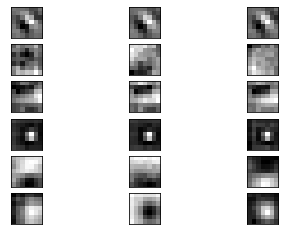

In [6]:
# plot first six filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

We can use this information and design a new model that is a subset of the layers in the full VGG16 model. The model would have the same input layer as the original model, but the output would be the output of a given convolutional layer, which we know would be the activation of the layer or the feature map. For example, after loading the VGG model, we can define a new model that outputs a feature map from the first convolutional layer (index 1) as follows. Making a prediction with this model will give the feature map for the first convolutional layer for a given provided input image. 

In [7]:
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[9].output)
# this model is much smaller than the VGG16 model, but still uses 
# the same weights (filters) in the first convolutional layer as 
# the VGG16 model.
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 230, 230, 3)       0         
_________________________________________________________________
conv1_conv (Conv2D)          (None, 112, 112, 64)      9472      
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 64)      256       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 64)      0         
_________________________________________________________________
pool1_pad (ZeroPadding2D)    (None, 114, 114, 64)      0         
_________________________________________________________________
pool1_pool (MaxPooling2D)    (None, 56, 56, 64)       

In [8]:
# load the image with the required shape
img = load_img('StopSign.jpg', target_size=(224, 224))
# convert the image to an array
# the image PIL object needs to be converted to a NumPy array of 
# pixel data and expanded from a 3D array to a 4D array with the 
# dimensions of [samples, rows, cols, channels], where we only 
# have one sample.
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
# See https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
img = preprocess_input(img)

In [9]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

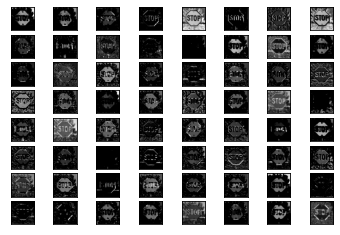

In [10]:
# The result will be a feature map with 224x224x64. 
# We can plot all 64 two-dimensional images as an 8×8 square of images.
# plot the output from each block
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()